## Adult-Income Dataset
[source] https://archive.ics.uci.edu/dataset/2/adult :
Predict whether income exceeds $50K/yr based on census data

**Attribute information**
1.   age: continuous.
2.   workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.List item
3.  fnlwgt: continuous.
4.  education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5.  education-num: continuous.
6.  marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7.  occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. sex: Female, Male.
11. capital-gain: continuous.
12. capital-loss: continuous.
13. hours-per-week: continuous.
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

**The outcome (Label)**
15. Income: >50K, <=50K

## อ่านชุดข้อมูล Adult Income

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/saravrajavelu/Adult-Income-Analysis/master/adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## ในชุดข้อมูลดังกล่าว missing values จะแสดงเป็นค่า '?' แแสดงจำนวน missing values ในแต่ละ attribute  

In [ ]:
df.isin(['?']).sum()
df.isin(['>50K']).sum()
df.isin(['<=50K']).sum()
# print(df.dtypes)
categorical_columns = df.select_dtypes(include=['category', 'object']).columns
# print(categorical_columns)
df['age'].mean()
# print(df['marital-status'].unique())
df.loc[(df['age'] > 40) & (df['income'] == '>50K')&(df['marital-status']=='Never-married')]
df['hours-per-week'].max()
# print(df['native-country'].unique())
df.loc[df['hours-per-week']==99]
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## ข้อ 3.   

In [ ]:
import numpy as np
df['workclass'].replace(('?', np.nan),inplace = True)
df['occupation'].replace(('?',np.nan),inplace=True)
df['native-country'].replace(('?',np.nan),inplace=True)
# df.isin([np.nan]).sum()
df.fillna(df.mode().iloc[0], inplace=True)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Machine-op-inspct,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## ข้อ 4.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
newdf = df.copy()
label_encoder = LabelEncoder()
for i in newdf.columns:
  if newdf[i].dtype == 'object':
    newdf[i] = label_encoder.fit_transform(newdf[i])
X = newdf.drop(["income"],axis=1)
Y = newdf['income']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, X_test.shape)

(39073, 14) (9769, 14)


## ข้อ 5.

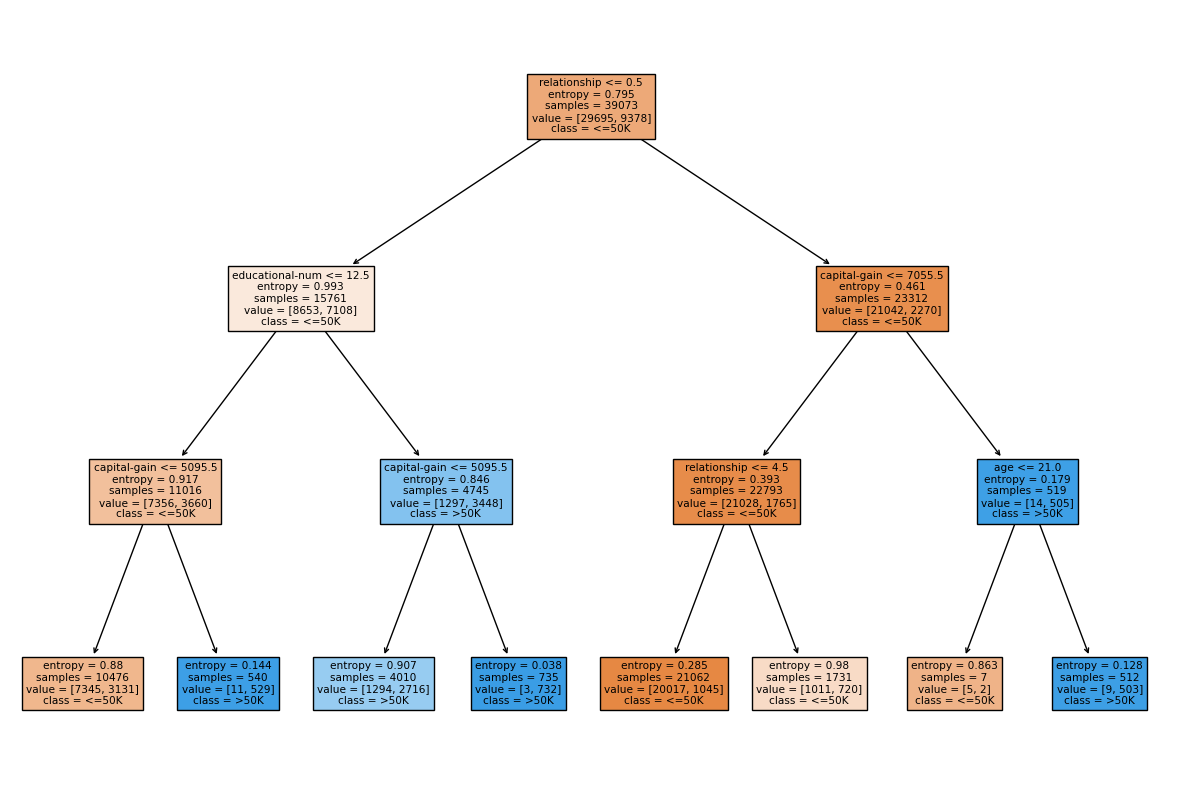

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt
clf = DecisionTreeClassifier(max_depth=3,criterion='entropy')
clf.fit(X_train,y_train)
plt.figure(figsize=(15,10))
plot_tree(clf,filled=True,feature_names=df.columns,class_names=df['income'].unique())
plt.show()


## ข้อ 6.

In [ ]:
ans = clf.score(X_test,y_test)
print('accuracy of the decision tree model : {}'.format(ans*100))

accuracy of the decision tree model : 0.8344764049544477


## ข้อ 7.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':list(range(3,10))}
bestparam = GridSearchCV(RandomForestClassifier(),parameters)
bestparam.fit(X_train,y_train)
temp = bestparam.best_params_['n_estimators']
clf2 = RandomForestClassifier(n_estimators=temp,max_depth=3,criterion='entropy')
clf2.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=8)

## ข้อ 8.

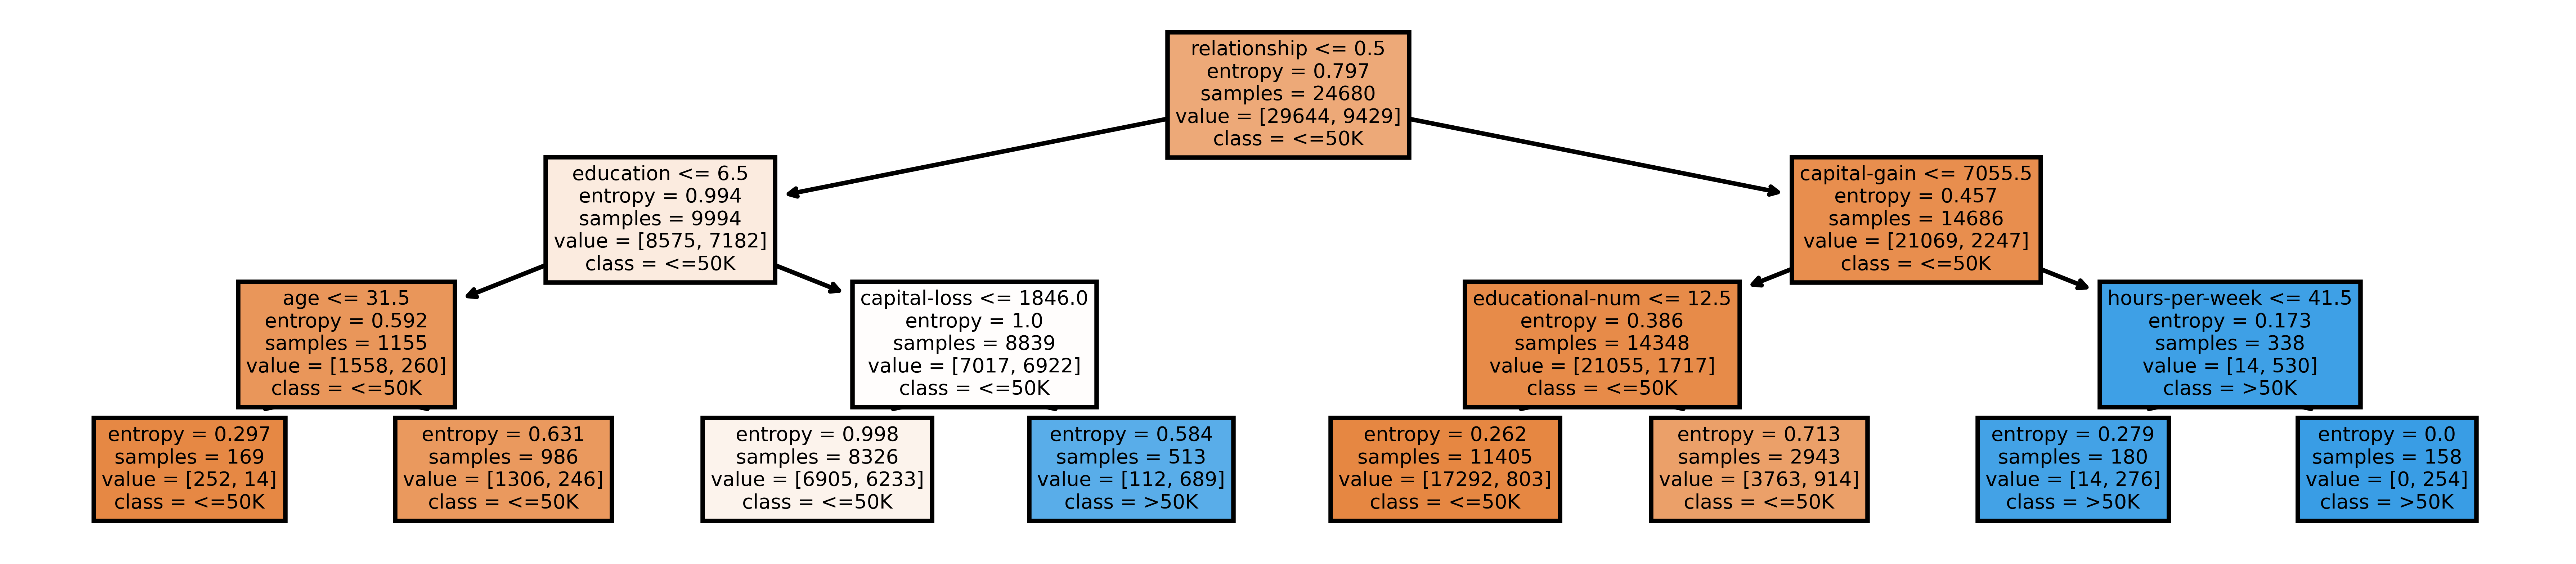

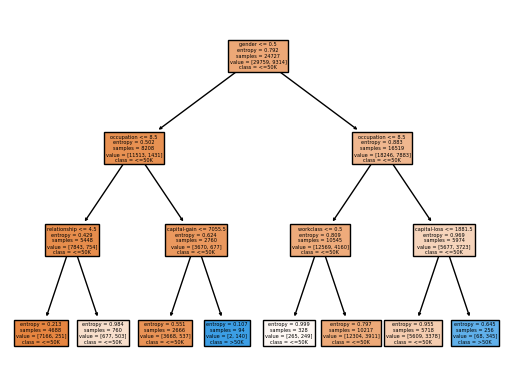

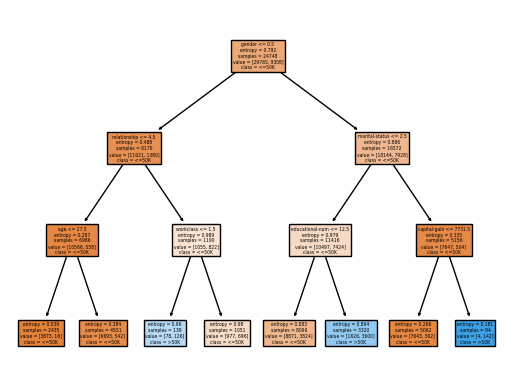

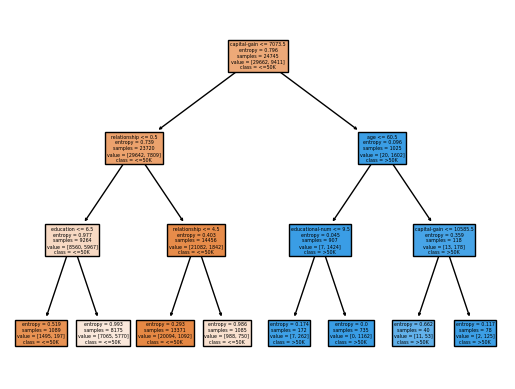

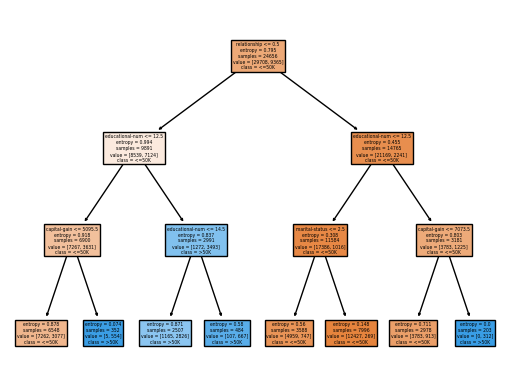

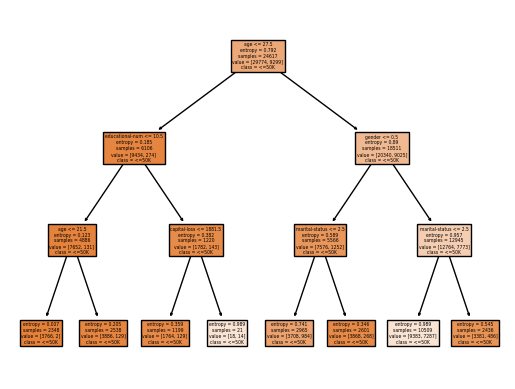

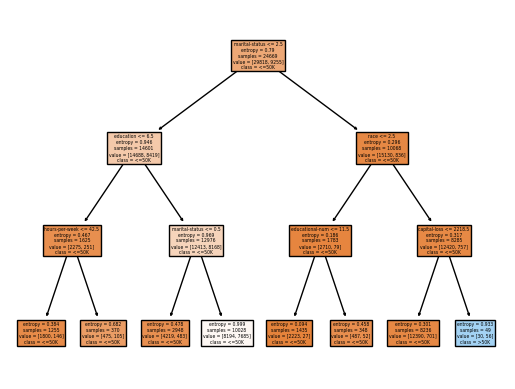

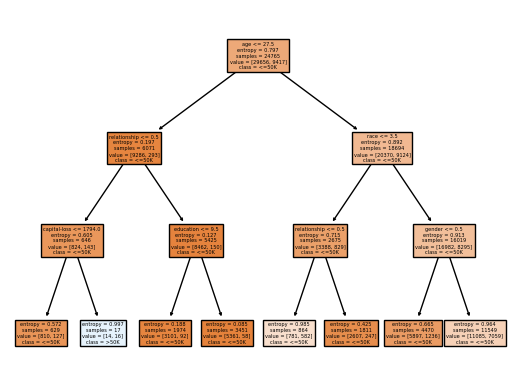

In [ ]:
fig, axe = plt.subplots(figsize=(10,2),dpi=900)
for i in range(temp):
  plot_tree(clf2.estimators_[i],filled=True,feature_names=df.columns,class_names=df['income'].unique())
  plt.show()

## ข้อ 9.

In [ ]:
ans2 = clf2.score(X_test,y_test)
print('accuracy of the random forest model  : {}'.format(ans2*100))

accuracy of the random forest model  : 82.10666393694339


## ข้อ 10.

In [ ]:
from ast import Num
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="multi:softmax",max_depth=3,n_estimators=temp,num_class=2)
xgb_model.fit(X_train,y_train)
ans3 = xgb_model.score(X_test,y_test)
print('accuracy of the xgboost model  : {}'.format(ans3*100))

accuracy of the xgboost model  : 84.62483365748797


## ข้อ 11.

In [ ]:
import pickle
filename = 'xgboost.csv'
pickle.dump(xgb_model, open(filename, 'wb'))